In [2]:
from rosbags.highlevel import AnyReader
from rosbags.typesys import Stores, get_typestore
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
original_bag = Path("/home/aaron/workspace/aquarium/aquarium_nano_data/2025_04_21_aquarium_data/rosbag2_2025_04_21-13_47_45")
rewritten_bag = Path("/home/aaron/workspace/aquarium/aquarium_jetson_nano/ros2/imu_bag_rewriter/rosbag2_2025_04_21-13_47_45_imu_rewriter")

imu_topic = "/imu"

In [ ]:
# Read rewritten data data

def read_imu_data(bagfile):

    typestore = get_typestore(Stores.ROS2_HUMBLE)

    imu_data = []
    with AnyReader([bagfile], default_typestore=typestore) as reader:

        print(reader.connections)

        connection = [c for c in reader.connections if c.topic == imu_topic]

        print(connection)

        for connection, timestamp, rawdata in reader.messages(connections=connection):

            print(connection.msgtype)
            msg = reader.deserialize(rawdata, connection.msgtype)

            imu_data.append(
                { 'bag_timestamp_ns': timestamp,
                'header_timestamp_sec': msg.header.stamp.sec,
                 'header_timestamp_ns': msg.header.stamp.nanosec}
            )

    return pd.DataFrame(imu_data)

original_imu = read_imu_data(original_bag)
rewritten_imu = read_imu_data(rewritten_bag)


[]
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Image
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Image
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Image
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Image
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_msgs/msg/Imu
sensor_ms

In [91]:
def reprocess_ts(imu):
    imu['bag_ts'] = imu.bag_timestamp_ns / 1e9
    imu['header_ts'] = imu.header_timestamp_sec + imu.header_timestamp_ns/1e9

    t0 = imu.bag_ts[0]

    imu['bag_ts'] -= t0
    imu['header_ts'] -= t0

    return imu

original_imu = reprocess_ts(original_imu)
rewritten_imu = reprocess_ts(rewritten_imu)
        
print(rewritten_imu.head(20))


       bag_timestamp_ns  header_timestamp_sec  header_timestamp_ns    bag_ts  \
0   1745268465445850583            1745268465            445100544  0.000000   
1   1745268465446741143            1745268465            450098688  0.000891   
2   1745268465455395105            1745268465            455097088  0.009544   
3   1745268465455689305            1745268465            460095232  0.009839   
4   1745268465465082267            1745268465            465093632  0.019232   
5   1745268465465321918            1745268465            470091776  0.019471   
6   1745268465472778106            1745268465            475090176  0.026927   
7   1745268465482549777            1745268465            480088320  0.036699   
8   1745268465482852610            1745268465            485086464  0.037002   
9   1745268465492769830            1745268465            490084864  0.046919   
10  1745268465493273400            1745268465            495083008  0.047423   
11  1745268465502819968            17452

1          NaN
2     0.004998
3     0.004998
4     0.004998
5     0.004998
6     0.004998
7     0.004998
8     0.004998
9     0.004998
10    0.004998
11    0.004998
12    0.004998
13    0.004998
14    0.004998
15   -0.022448
16    0.027446
17    0.004998
18    0.004998
19    0.004998
20   -0.042441
Name: header_ts, dtype: float64


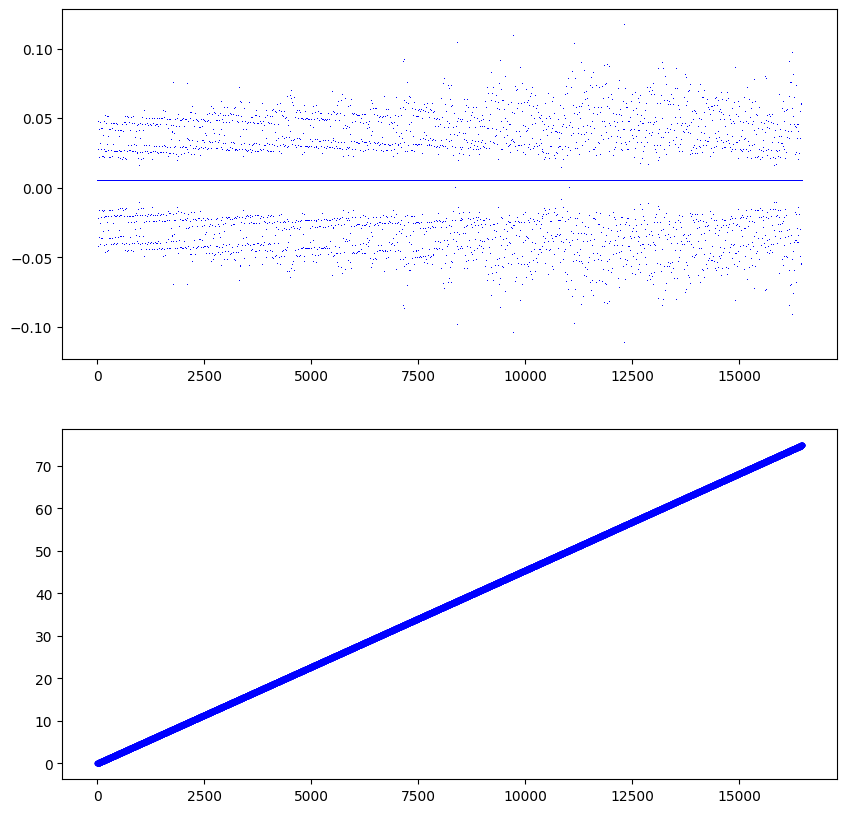

In [92]:
imu = rewritten_imu[ rewritten_imu.header_ts > 0 ]


header_delta = imu['header_ts'].diff()
bag_delta = imu['bag_ts'].diff()


print(header_delta.head(20))


fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].plot( header_delta,'b,')
ax[1].plot( imu.header_ts,'b.')